<a href="https://colab.research.google.com/github/smbrett/AudioDeepFakeDetection/blob/main/Deepfake_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Miscellaneous**

In [ ]:
def benchmark(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        seconds_elapsed = end_time - start_time
        minutes = int(seconds_elapsed // 60)
        seconds = seconds_elapsed % 60
        print(f"Function {func.__name__} took {minutes} minutes and {seconds} seconds to execute.")
        return result
    return wrapper

# **Loading in Data**

In [ ]:
# prompt: I want to download a kaggle dataset using their api

!pip install kaggle

# You need to upload your kaggle.json file to the runtime environment
# The kaggle.json file should contain your Kaggle API credentials

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download abdallamohamed312/in-the-wild-dataset
# Example:
# !kaggle datasets download -d uciml/iris
# If the dataset is in a zip file, you'll probably need to unzip it
# !unzip <dataset_name>.zip

!ls /content

!unzip /content/in-the-wild-dataset.zip

!ls /content/
!file /content/download
!unzip /content/download


Streaming output truncated to the last 5000 lines.
  inflating: release_in_the_wild/22251.wav  
  inflating: release_in_the_wild/22472.wav  
  inflating: release_in_the_wild/21437.wav  
  inflating: release_in_the_wild/1451.wav  
  inflating: release_in_the_wild/9082.wav  
  inflating: release_in_the_wild/20810.wav  
  inflating: release_in_the_wild/4210.wav  
  inflating: release_in_the_wild/12376.wav  
  inflating: release_in_the_wild/2772.wav  
  inflating: release_in_the_wild/22039.wav  
  inflating: release_in_the_wild/9847.wav  
  inflating: release_in_the_wild/15569.wav  
  inflating: release_in_the_wild/8969.wav  
  inflating: release_in_the_wild/21759.wav  
  inflating: release_in_the_wild/19010.wav  
  inflating: release_in_the_wild/19318.wav  
  inflating: release_in_the_wild/5514.wav  
  inflating: release_in_the_wild/20657.wav  
  inflating: release_in_the_wild/12380.wav  
  inflating: release_in_the_wild/27769.wav  
  inflating: release_in_the_wild/7749.wav  
  inflating:

In [ ]:
# # prompt: Can you mount the release in the wild directory to my drive and explain how to access it


# import os

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Specify the target directory in your Google Drive
# target_dir = "/content/drive/MyDrive/"  # Change this to your desired location

# # Create the target directory  if it doesn't exist
# if not os.path.exists(target_dir):
#     os.makedirs(target_dir)

# # Move the zipped dataset to the Google Drive directory
# !cp /content/in-the-wild-dataset.zip "{target_dir}"


# # Explanation on how to access the data:
# print("\nThe 'release_in_the_wild' dataset has been moved to your Google Drive.")
# print(f"Access the data at: {target_dir}")
# print("\nYou can now access the files using standard file paths in your Python code:")
# print("Example:")
# print("import os")
# print(f"for filename in os.listdir('{target_dir}'):")
# print(f"  filepath = os.path.join('{target_dir}', filename)")
# print("  # Do something with the file, e.g., read its contents")
# # print(f"  print(f'Processing file: {filepath}')")



# Loading in Dataset from File to Memory




In [ ]:

import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import time
import os




#going to use librosa for audio

csv_path = "/content/release_in_the_wild/meta.csv"
df = pd.read_csv(csv_path)


print(df.head())
print(df.shape)

rows = df.shape[0]

#turning categorical variable to regressive
# Using map for 'speaker' column

# Using numpy.where for 'label' column
# ohe = OneHotEncoder()
# df["label"] = ohe.fit_transform(df["label"])
df['label'] = np.where(df['label'] == "spoof", 1, 0)
df.head()


    file               speaker      label
0  0.wav         Alec Guinness      spoof
1  1.wav         Alec Guinness      spoof
2  2.wav          Barack Obama      spoof
3  3.wav         Alec Guinness      spoof
4  4.wav  Christopher Hitchens  bona-fide
(31779, 3)


,file,speaker,label
0,0.wav,Alec Guinness,1
1,1.wav,Alec Guinness,1
2,2.wav,Barack Obama,1
3,3.wav,Alec Guinness,1
4,4.wav,Christopher Hitchens,0


# **Data Visualization**



> Analyzing figure count



> Looking for imbalance per celebrity





In [ ]:
print(df['speaker'].unique().size)
print(df['speaker'].value_counts())

54
speaker
Barack Obama                3636
Alec Guinness               3625
Donald Trump                3423
Bernie Sanders              2877
Ayn Rand                    2493
Bill Clinton                1832
Ronald Reagan               1536
Christopher Hitchens        1339
Winston Churchill            882
Martin Luther King           799
JFK                          669
Milton Friedman              589
Mark Zuckerberg              582
FDR                          471
Queen Elizabeth II           464
Louis Farrakhan              410
Alexandria Ocasio-Cortez     390
Nelson Mandela               381
Alan Watts                   378
Richard Nixon                359
Arnold Schwarzenegger        351
The Notorious B.I.G.         329
Boris Johnson                295
Dwight Eisenhower            268
George Carlin                248
George W. Bush               230
Adam Driver                  217
Gilbert Gottfried            208
Orson Welles                 202
Bill Burr                    201

<ipython-input-6-74173dded9d5>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
<ipython-input-6-74173dded9d5>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)


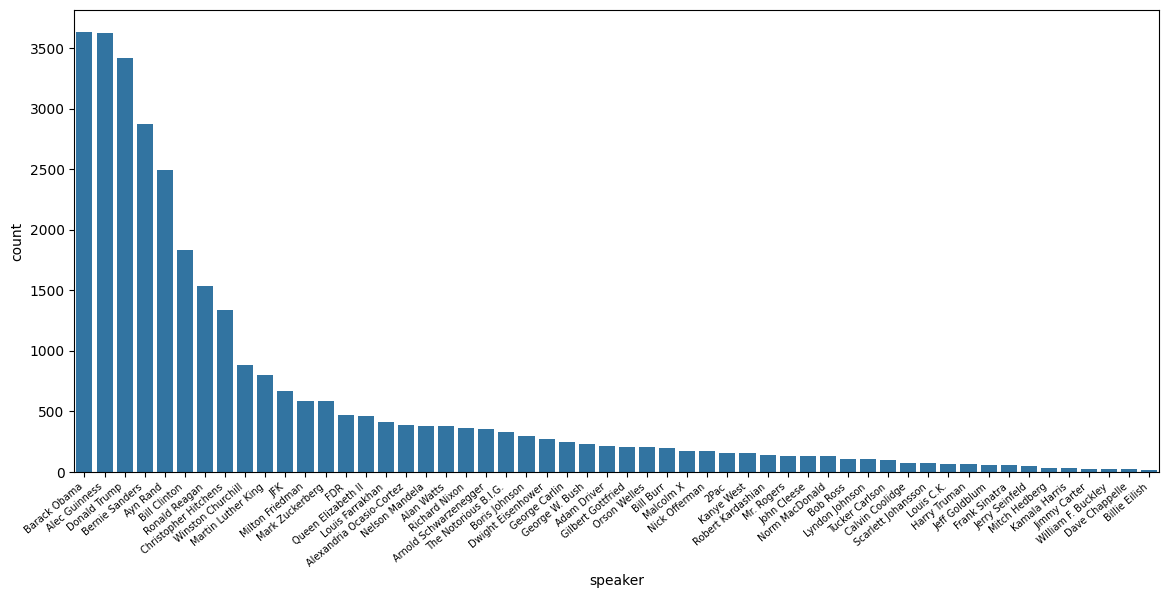

In [ ]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(df, x='speaker', order=df['speaker'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

plt.show()

<ipython-input-7-16984992ff80>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
<ipython-input-7-16984992ff80>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)


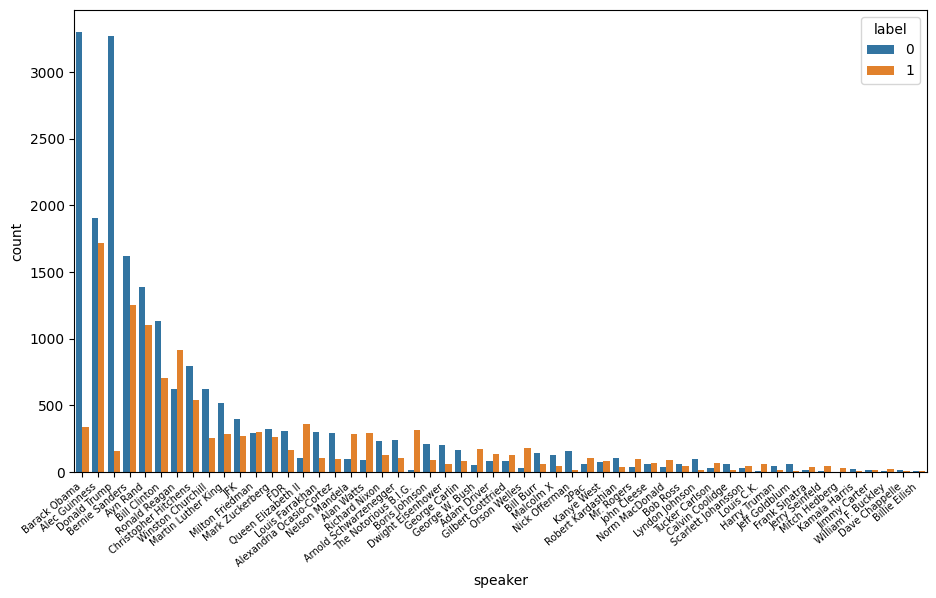

In [ ]:
#want to figure out how to truncate the top

plt.figure(figsize=(11, 6))

ax = sns.countplot(df, x='speaker', order=df['speaker'].value_counts().index, hue='label')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

plt.show()

#clearly imbalanced in terms of fake and real voices




Class Imbalance (Real vs. Fake):
label
0    62.818213
1    37.181787
Name: proportion, dtype: float64

Class Imbalance (Real vs. Fake) per Speaker:

Speaker: Alec Guinness
label
0    52.606897
1    47.393103
Name: proportion, dtype: float64

Speaker: Barack Obama
label
0    90.814081
1     9.185919
Name: proportion, dtype: float64

Speaker: Christopher Hitchens
label
0    59.596714
1    40.403286
Name: proportion, dtype: float64

Speaker: Ayn Rand
label
0    55.716005
1    44.283995
Name: proportion, dtype: float64

Speaker: Donald Trump
label
0    95.471808
1     4.528192
Name: proportion, dtype: float64

Speaker: Bernie Sanders
label
0    56.41293
1    43.58707
Name: proportion, dtype: float64

Speaker: Calvin Coolidge
label
0    79.452055
1    20.547945
Name: proportion, dtype: float64

Speaker: Winston Churchill
label
0    70.861678
1    29.138322
Name: proportion, dtype: float64

Speaker: Bob Ross
label
0    55.555556
1    44.444444
Name: proportion, dtype: float64

Speaker: Rich

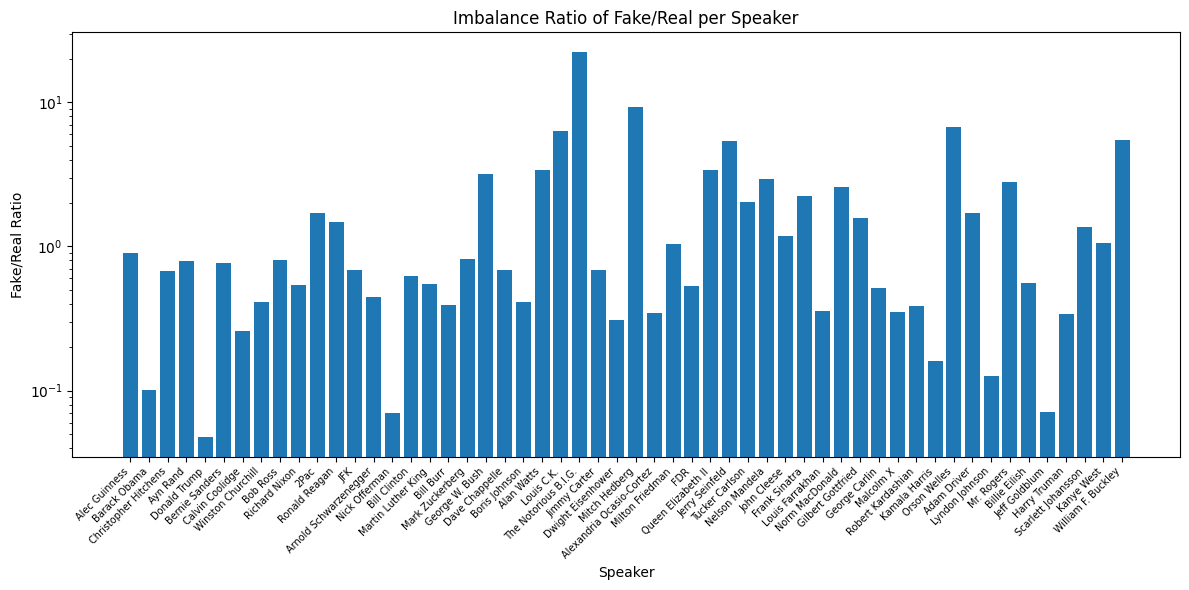

In [ ]:
# prompt: Can you help me check out class imbalance in my dataset between real and fake and with real and fake within speakers

import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ... (Your existing code)

# Check class imbalance for real vs. fake
print("\nClass Imbalance (Real vs. Fake):")
print(df['label'].value_counts(normalize=True) * 100)  # Percentage

# Check class imbalance for real vs. fake within each speaker
print("\nClass Imbalance (Real vs. Fake) per Speaker:")
for speaker in df['speaker'].unique():
    speaker_df = df[df['speaker'] == speaker]
    print(f"\nSpeaker: {speaker}")
    print(speaker_df['label'].value_counts(normalize=True) * 100)

# Calculate and visualize imbalance ratios
print("\nImbalance Ratios:")
for speaker in df['speaker'].unique():
    speaker_df = df[df['speaker'] == speaker]
    real_count = len(speaker_df[speaker_df['label'] == 0])
    fake_count = len(speaker_df[speaker_df['label'] == 1])
    if fake_count > 0 :
      ratio = real_count / fake_count
    else:
      ratio = "inf"
    print(f"Speaker {speaker}: Real/Fake = {ratio}")

#Plotting the imbalance ratio
ratios = []
speakers = []

for speaker in df['speaker'].unique():
    speaker_df = df[df['speaker'] == speaker]
    real_count = len(speaker_df[speaker_df['label'] == 0])  # 0 indicates real
    fake_count = len(speaker_df[speaker_df['label'] == 1])  # 1 indicates fake

    # Calculate Fake/Real Ratio
    if real_count > 0 :
      ratio = fake_count / real_count
    else:
      # Instead of np.inf, assign a large value
      ratio = 1e6  # Assign a large value (1 million)

    ratios.append(ratio)
    speakers.append(speaker)

plt.figure(figsize=(12, 6))
plt.bar(speakers, ratios)
plt.xlabel("Speaker")
plt.ylabel("Fake/Real Ratio")  # Changed y-axis label
plt.title("Imbalance Ratio of Fake/Real per Speaker") # Changed title
plt.xticks(rotation=45, ha="right", fontsize=7)
plt.yscale("log") # Use log scale to visualize large differences better
plt.tight_layout()
plt.show()

In [ ]:
# # prompt: Can you graph my mfcc as a spectrogram

# import librosa
# import librosa.display
# import matplotlib.pyplot as plt

# # Assuming Mel_arrays contains the MFCCs as calculated in your previous code
# # Example:
# # Mel_arrays = [mfccs1, mfccs2, ...]  # where each mfccs_i is a MFCC matrix (n_mfcc, n_frames)

# def plot_mfcc_spectrogram(mfccs, sr):
#   plt.figure(figsize=(10, 4))
#   librosa.display.specshow(mfccs, sr=sr, x_axis='time')
#   plt.colorbar(format='%+2.0f dB')
#   plt.title('MFCC Spectrogram')
#   plt.tight_layout()
#   plt.show()

# # Example usage (assuming you have your MFCCs in the Mel_arrays list):

# # Accessing mfccs for example
# # Replace 0 with the actual index if you have multiple MFCC arrays
# for i in range(10):
#   if len(Mel_arrays) > 0 and Mel_arrays[i] is not None:
#       example_mfccs = Mel_arrays[i]

#       # Replace sr with your actual sample rate (e.g. sr=16000)
#       plot_mfcc_spectrogram(example_mfccs, sr=16000)
#       print(y_val[:i+1])
#   else:
#       print("No MFCC data available or valid.")



# **`Loading In Audio Data`**



In [ ]:
#From chatGPT addressing data imbalance
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming your DataFrame is named `df` and has columns: 'label' (0=Real, 1=Fake), 'speaker', and 'audio_path'

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Balance Real/Fake classes using oversampling
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

# Combine back into a DataFrame
df_balanced = pd.concat([X_under, y_under], axis=1)
print(df_balanced['label'].value_counts())  # Check balance


label
0    11816
1    11816
Name: count, dtype: int64


In [ ]:
from collections import Counter

# Function to balance real/fake for each speaker
def balance_per_speaker(df):
    balanced_data = []
    speakers = df['speaker'].unique()
    for speaker in speakers:
        speaker_data = df[df['speaker'] == speaker]

        # Separate features and target
        X_speaker = speaker_data.drop(columns=['label'])
        y_speaker = speaker_data['label']

        # Skip speakers with only one class
        if len(y_speaker.unique()) == 1:
            balanced_data.append(speaker_data)
            continue

        # Balance using oversampling
        oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
        X_balanced, y_balanced = oversampler.fit_resample(X_speaker, y_speaker)

        # Combine back into a DataFrame
        speaker_balanced = pd.concat([X_balanced, y_balanced], axis=1)
        balanced_data.append(speaker_balanced)

    # Concatenate all speakers
    return pd.concat(balanced_data, ignore_index=True)

df_balanced_speakers = balance_per_speaker(df_balanced)


Class Imbalance (Real vs. Fake):
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Class Imbalance (Real vs. Fake) per Speaker:

Speaker: Adam Driver
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Donald Trump
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Bernie Sanders
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: JFK
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Barack Obama
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Mark Zuckerberg
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Ayn Rand
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Kanye West
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Alec Guinness
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Louis Farrakhan
label
0    50.0
1    50.0
Name: proportion, dtype: float64

Speaker: Winston Churchill
label
0    50.0
1   

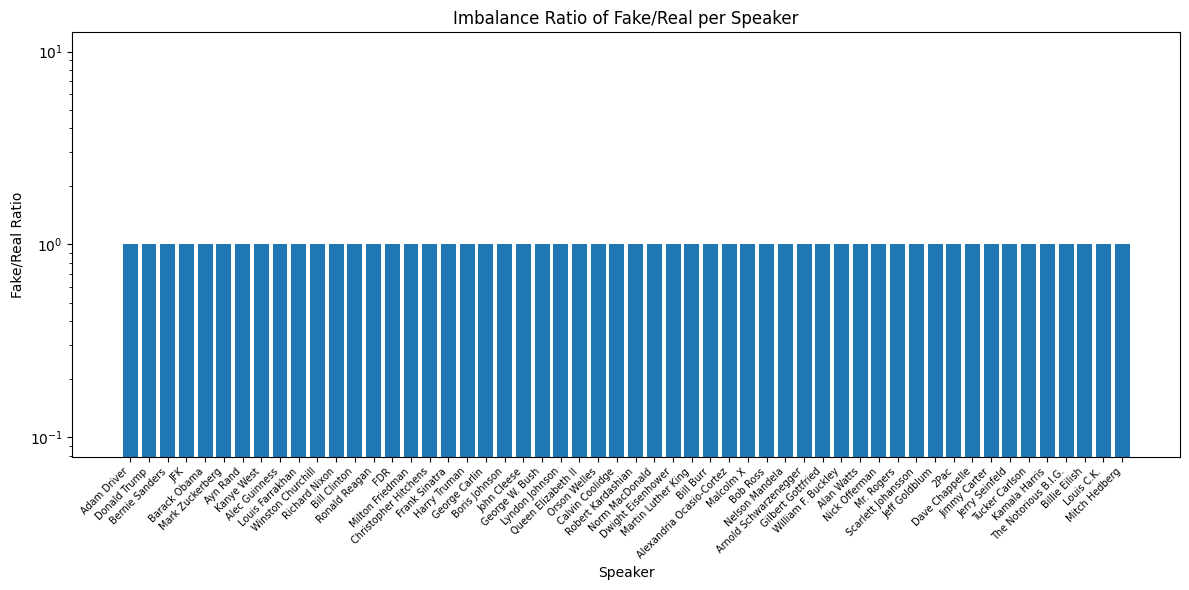

,0
file,31710
speaker,31710
label,31710


In [ ]:
# prompt: Can you help me check out class imbalance in my dataset between real and fake and with real and fake within speakers

import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ... (Your existing code)

# Check class imbalance for real vs. fake
print("\nClass Imbalance (Real vs. Fake):")
print(df_balanced_speakers['label'].value_counts(normalize=True) * 100)  # Percentage

# Check class imbalance for real vs. fake within each speaker
print("\nClass Imbalance (Real vs. Fake) per Speaker:")
for speaker in df_balanced_speakers['speaker'].unique():
    speaker_df = df_balanced_speakers[df_balanced_speakers['speaker'] == speaker]
    print(f"\nSpeaker: {speaker}")
    print(speaker_df['label'].value_counts(normalize=True) * 100)

# Calculate and visualize imbalance ratios
print("\nImbalance Ratios:")
for speaker in df_balanced_speakers['speaker'].unique():
    speaker_df = df_balanced_speakers[df_balanced_speakers['speaker'] == speaker]
    real_count = len(speaker_df[speaker_df['label'] == 0])
    fake_count = len(speaker_df[speaker_df['label'] == 1])
    if fake_count > 0 :
      ratio = real_count / fake_count
    else:
      ratio = "inf"
    print(f"Speaker {speaker}: Real/Fake = {ratio}")

#Plotting the imbalance ratio
ratios = []
speakers = []

for speaker in df_balanced_speakers['speaker'].unique():
    speaker_df = df_balanced_speakers[df_balanced_speakers['speaker'] == speaker]
    real_count = len(speaker_df[speaker_df['label'] == 0])  # 0 indicates real
    fake_count = len(speaker_df[speaker_df['label'] == 1])  # 1 indicates fake

    # Calculate Fake/Real Ratio
    if real_count > 0 :
      ratio = fake_count / real_count
    else:
      # Instead of np.inf, assign a large value
      ratio = 1e6  # Assign a large value (1 million)

    ratios.append(ratio)
    speakers.append(speaker)

plt.figure(figsize=(12, 6))
plt.bar(speakers, ratios)
plt.xlabel("Speaker")
plt.ylabel("Fake/Real Ratio")  # Changed y-axis label
plt.title("Imbalance Ratio of Fake/Real per Speaker") # Changed title
plt.xticks(rotation=45, ha="right", fontsize=7)
plt.yscale("log") # Use log scale to visualize large differences better
plt.tight_layout()
plt.show()

df_balanced_speakers.count()

If we want to address class imbalance or not

In [ ]:
df_process = df

In [ ]:
df_process = df_balanced_speakers

In [ ]:



categorical_columns = ['speaker']
# Use pd.get_dummies() to one-hot encode the categorical columns
df_pandas_encoded = pd.get_dummies(df_process, columns=['speaker'], drop_first=True)
# print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(df_process[categorical_columns])

# Create a DataFrame with the encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out(categorical_columns))
# print(one_hot_df.head(), "should have a df with the values encoded into a vector")
# pc = PCA(n_components=1)
df_sklearn_encoded = pd.concat([df_process.drop(categorical_columns, axis=1), one_hot_df], axis=1)
if df_sklearn_encoded["label"].isin(['spoof']).any():
  df_sklearn_encoded["label"] = np.where(df_process["label"] == "spoof", 1, 0)
# Pca = PCA(n_components=1)
# df_sklearn_encoded[one_hot_df.columns] = Pca.fit_transform(df_sklearn_encoded[one_hot_df.columns])
# print(df_sklearn_encoded.head())
print(df_sklearn_encoded.head())
# print(np.where(df_sklearn_encoded['label'] == 1), "printed values")



        file  label  speaker_2Pac  speaker_Adam Driver  speaker_Alan Watts  \
0   3491.wav      0           0.0                  1.0                 0.0   
1  31222.wav      0           0.0                  1.0                 0.0   
2   1312.wav      0           0.0                  1.0                 0.0   
3  10612.wav      0           0.0                  1.0                 0.0   
4   9335.wav      0           0.0                  1.0                 0.0   

   speaker_Alec Guinness  speaker_Alexandria Ocasio-Cortez  \
0                    0.0                               0.0   
1                    0.0                               0.0   
2                    0.0                               0.0   
3                    0.0                               0.0   
4                    0.0                               0.0   

   speaker_Arnold Schwarzenegger  speaker_Ayn Rand  speaker_Barack Obama  ...  \
0                            0.0               0.0                   0.0  ...

In [ ]:


train, test = train_test_split(df_sklearn_encoded, test_size=0.2, stratify=df_sklearn_encoded['label'], random_state=42)
train, val = train_test_split(train, test_size=0.2, stratify=train['label'], random_state=42)
X_train, y_train = train.drop(columns=['label']), train['label']
X_val, y_val = val.drop(columns=['label']), val['label']
X_test, y_test = test.drop(columns=['label']), test['label']
print(X_train.shape, X_test.shape, X_val.shape)

(20294, 55) (6342, 55) (5074, 55)


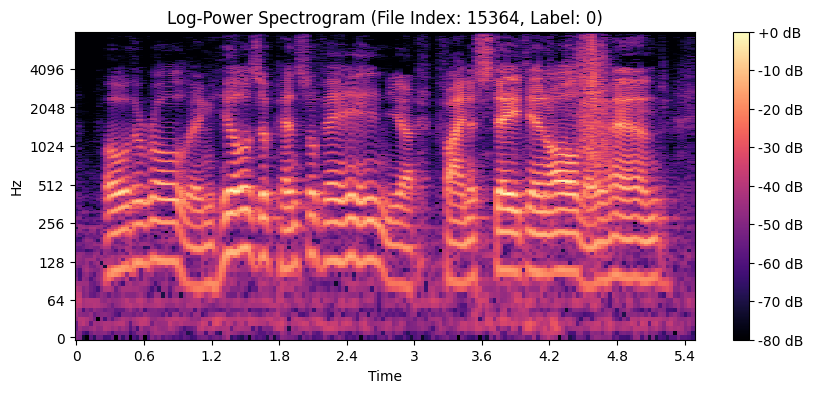

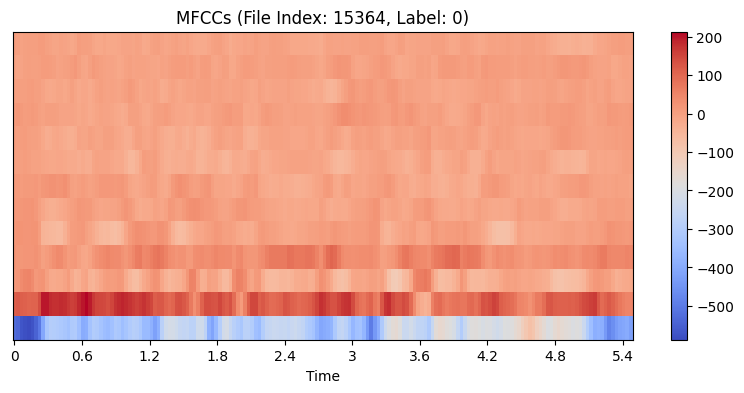

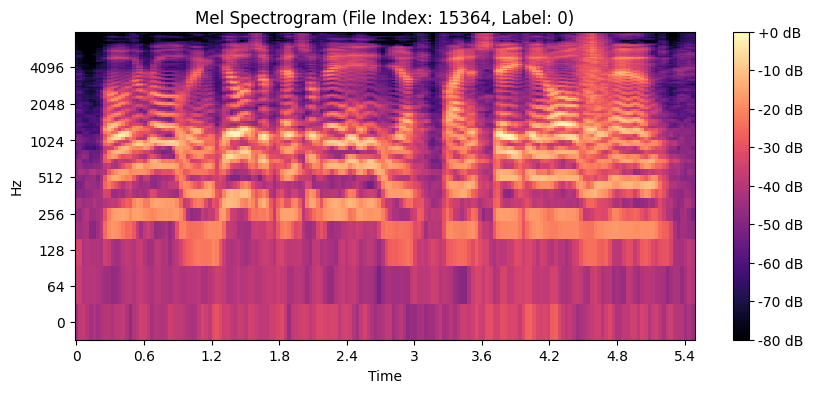

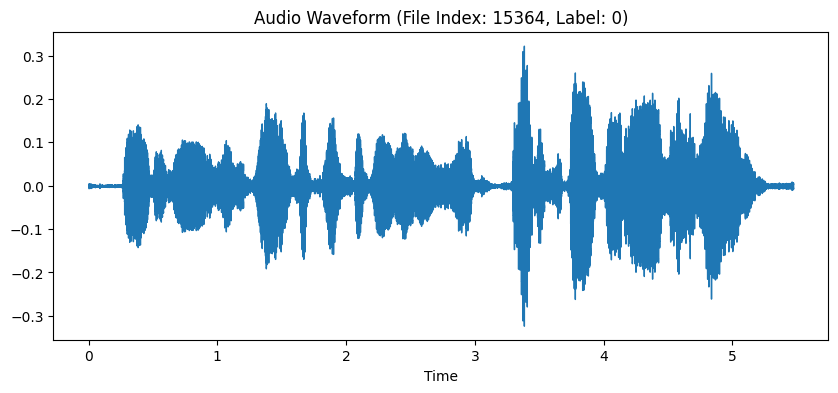

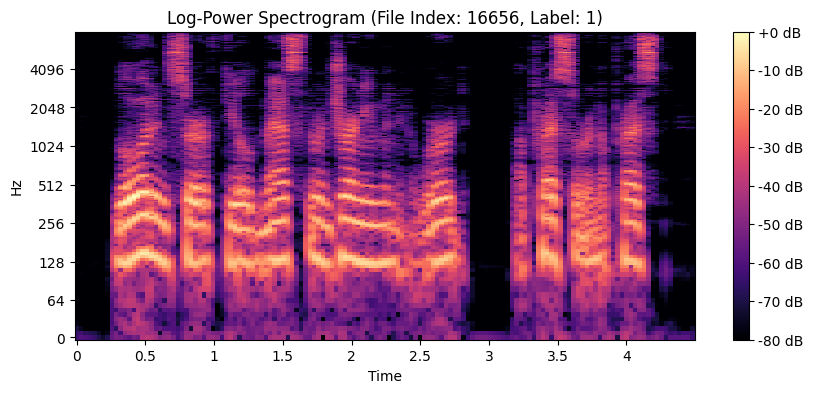

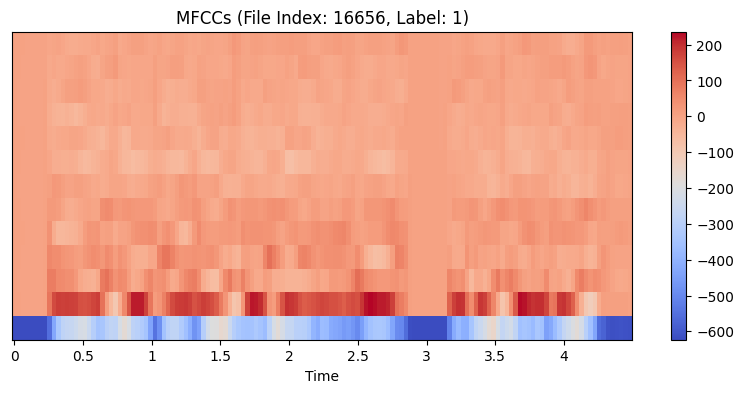

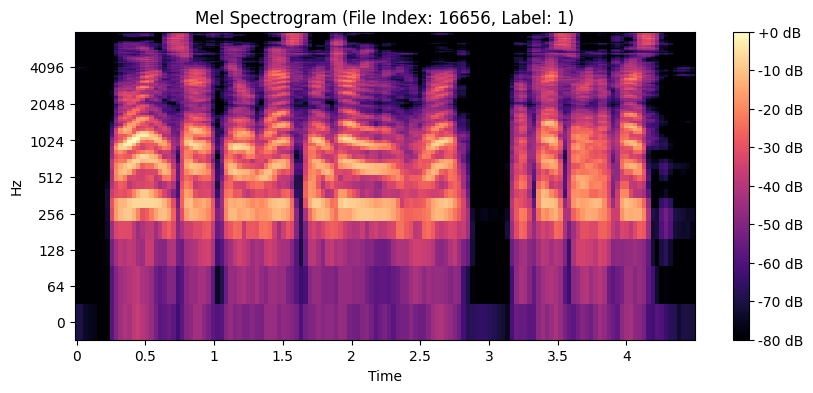

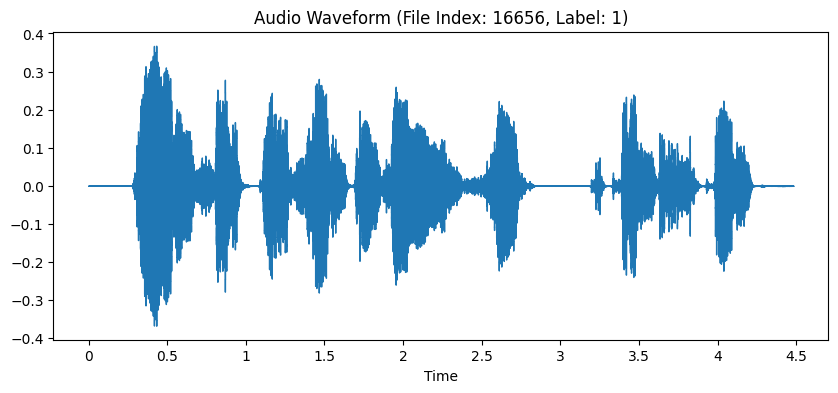

In [ ]:
# prompt: I want to select two random files from x_val where y_val == 1 and == 0 and display sfft logbanks and mfcc for them

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random

# Assuming 'mapped_array' and 'y_val' are defined from the previous code



#looking through I noticed that there are these high decibal stripes in the real audio and more consisten decibal output in the fake audio

def display_features(file_index, y):
    audio_file = "release_in_the_wild/" + X_train.iloc[file_index]['file']
    sr = 16000  # Assuming sample rate is 16000
    y,sr = librosa.load(audio_file, sr=sr)

    # Short-Time Fourier Transform (STFT) and Log-Power Spectrogram
    stft = librosa.stft(y)
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-Power Spectrogram (File Index: {file_index}, Label: {y_train.iloc[file_index]})')
    plt.show()

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs (File Index: {file_index}, Label: {y_train.iloc[file_index]})')
    plt.show()

    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram (File Index: {file_index}, Label: {y_train.iloc[file_index]})')
    plt.show()

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    # plt.colorbar()
    plt.title(f'Audio Waveform (File Index: {file_index}, Label: {y_train.iloc[file_index]})')
    plt.show()






# Select two random files for each label (0 and 1)
# random.seed(42) # for reproducibility
indices_1 = y_train[y_train == 1].index.tolist()
indices_0 = y_train[y_train == 0].index.tolist()

# Select a random index from each set
random_index_fake = random.choice(indices_1)
random_index_real = random.choice(indices_0)
selected_indices = [X_train.index.get_loc(random_index_real), X_train.index.get_loc(random_index_fake)]

# # Display features for the selected files
for index in selected_indices:
  display_features(index, y_val)

In [ ]:
import librosa
import numpy as np
import pandas as pd
import os
from multiprocessing import Pool
from functools import partial
from tqdm import tqdm
#From claude asked what the best methods could be between chatGPT and Claude and got them to negotiate

def load_and_trim_audio(audio_path, target_duration=3, sr=16000):
    """
    Load an audio file and ensure it's exactly target_duration seconds long.

    This function handles both trimming longer files and padding shorter ones.
    Think of it like making sure every photo is exactly the same size - we either
    crop it if it's too big or add blank space if it's too small.

    Parameters:
        audio_path: Path to the audio file
        target_duration: Desired length in seconds (default: 3)
        sr: Sample rate (default: 22050 Hz - standard for speech analysis)

    Returns:
        numpy array: Audio data of exactly (target_duration * sr) samples
    """
    # Calculate our target number of samples
    target_samples = int(target_duration * sr)

    # Load the audio file
    y, loaded_sr = librosa.load(audio_path, sr=sr)

    # If the audio is longer than target_duration
    if len(y) > target_samples:
        # Take the middle section to avoid potential silence at start/end
        start = (len(y) - target_samples) // 2
        y = y[start:start + target_samples]

    # If the audio is shorter than target_duration
    elif len(y) < target_samples:
        # Create a zero-padded array of the target size
        padded = np.zeros(target_samples)
        # Place the audio in the middle of the padded array
        start = (target_samples - len(y)) // 2
        padded[start:start + len(y)] = y
        y = padded

    return y

def extract_features(y, sr=22050, n_mfcc=13, hop_length=512):
    """
    Extract all our features from a fixed-length audio sample.

    This function calculates multiple features that help identify synthetic speech:
    - Phase coherence: Detects unnatural phase relationships
    - Spectral flux: Identifies sudden changes in frequency content
    - Spectral flatness: Measures the "noisiness" vs. "tonality"
    - MFCCs: Captures the overall spectral shape and vocal characteristics

    Parameters:
        y: Audio time series
        sr: Sample rate
        n_mfcc: Number of MFCC coefficients
        hop_length: Number of samples between frames
    """
    # Calculate STFT once and reuse it for multiple features
    D = librosa.stft(y, hop_length=hop_length)
    mag_spec = np.abs(D)

    # 1. Phase Coherence
    phase = np.angle(D)
    phase_diff = np.diff(phase, axis=1)
    phase_coherence = np.mean(np.abs(np.cos(phase_diff)), axis=0)

    # 2. Spectral Flux
    flux = np.sqrt(np.sum(np.diff(mag_spec, axis=1)**2, axis=0))

    # 3. Spectral Flatness
    flatness = librosa.feature.spectral_flatness(S=mag_spec)[0]

    # 4. MFCCs and their derivatives
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length)
    mfcc_deltas = librosa.feature.delta(mfccs)
    mfcc_delta2 = librosa.feature.delta(mfccs, order=2)

    # Create a dictionary to store all our features
    features = {}

    # Basic features
    features.update({
        'phase_coherence_mean': np.mean(phase_coherence),
        'phase_coherence_std': np.std(phase_coherence),
        'spectral_flux_mean': np.mean(flux),
        'spectral_flux_std': np.std(flux),
        'spectral_flatness_mean': np.mean(flatness),
        'spectral_flatness_std': np.std(flatness)
        #zero crossing rate
    })

    # MFCC features (including deltas)
    for i in range(n_mfcc):
        features.update({
            f'mfcc_{i}_mean': np.mean(mfccs[i]),
            f'mfcc_{i}_std': np.std(mfccs[i]),
            f'mfcc_delta_{i}_mean': np.mean(mfcc_deltas[i]),
            f'mfcc_delta_{i}_std': np.std(mfcc_deltas[i]),
            f'mfcc_delta2_{i}_mean': np.mean(mfcc_delta2[i]),
            f'mfcc_delta2_{i}_std': np.std(mfcc_delta2[i])
        })

    return features

def process_single_file(filename, input_dir, target_duration=3):
    """
    Process a single audio file and return its features with filename.
    """
    try:
        audio_path = os.path.join(input_dir, filename)
        y = load_and_trim_audio(audio_path, target_duration)
        features = extract_features(y)
        # features['filename'] = filename
        return features, None  # Return None as error
    except Exception as e:
        return None, f"Error processing {filename}: {str(e)}"  # Return error message

@benchmark

def process_audio_directory_parallel(input_dir, output_path, df, target_duration=3, n_processes=4, save=True):
    """
    Process audio files in parallel while maintaining order.

    Parameters:
        input_dir: Input directory containing audio files
        output_path: Path to save CSV
        target_duration: Duration to standardize audio to
        n_processes: Number of parallel processes to use
    """
    # Get list of audio files
    audio_files = [input_dir + f for f in df['file']
                   if f.endswith(('.wav', '.mp3', '.m4a'))]

    # Create partial function with fixed parameters
    process_func = partial(process_single_file,
                         input_dir=input_dir,
                         target_duration=target_duration)

    # Process files in parallel with progress bar
    with Pool(n_processes) as pool:
        results = list(tqdm(
            pool.imap(process_func, audio_files),
            total=len(audio_files),
            desc="Processing audio files"
        ))

    # Separate successful results and errors
    features_list = []
    errors = []

    for (features, error), filename in zip(results, audio_files):
        if error:
            errors.append(error)
        elif features:
            features_list.append(features)

    # Create and save DataFrame
    if features_list and save:
        df = pd.DataFrame(features_list)
        df.to_csv(output_path, index=False)

    # Print errors if any
    if errors:
        print("\nErrors encountered:")
        for error in errors:
            print(error)
    if save:
      return len(features_list), len(errors)
    else:
      return features_list, len(features_list),len(errors)

# Usage in Colab
from google.colab import drive
drive.mount('/content/drive')

input_directory = '/content/release_in_the_wild/'
output_file = '/content/drive/MyDrive/features.csv'

# Process files using all available CPU cores minus 1
import multiprocessing
n_cores = max(1, multiprocessing.cpu_count() - 1)

successful, failed = process_audio_directory_parallel(
    input_directory,
    output_file,
    df=X_train,
    n_processes=n_cores,
    save=True
)

print(f"\nProcessing complete:")
print(f"Successfully processed: {successful} files")
print(f"Failed to process: {failed} files")

Mounted at /content/drive


Processing audio files: 100%|██████████| 20294/20294 [08:46<00:00, 38.53it/s]


Function process_audio_directory_parallel took 8 minutes and 52.60498023033142 seconds to execute.

Processing complete:
Successfully processed: 20294 files
Failed to process: 0 files


In [ ]:
features_list, successful, failed = process_audio_directory_parallel(
    input_directory,
    output_file,
    n_processes=n_cores,
    df=X_val,
    save=False
)

feature_list = pd.DataFrame(features_list)

print(f"\nProcessing complete:")
print(f"Successfully processed: {successful} files")
print(f"Failed to process: {failed} files")

print(feature_list.head())

Processing audio files: 100%|██████████| 5074/5074 [02:09<00:00, 39.27it/s]


Function process_audio_directory_parallel took 2 minutes and 9.31309461593628 seconds to execute.

Processing complete:
Successfully processed: 5074 files
Failed to process: 0 files
   phase_coherence_mean  phase_coherence_std  spectral_flux_mean  \
0              0.628542             0.010279           28.467669   
1              0.628222             0.013482           42.601643   
2              0.794545             0.182712           17.071293   
3              0.629701             0.009543           12.163857   
4              0.632440             0.010601           35.226936   

   spectral_flux_std  spectral_flatness_mean  spectral_flatness_std  \
0          22.185570                0.030234               0.049128   
1          16.746145                0.004639               0.013330   
2          29.301282                0.458771               0.497000   
3           6.387807                0.050506               0.101244   
4          21.973328                0.020328          

In [ ]:
testing_features, successful, failed = process_audio_directory_parallel(
    input_directory,
    output_file,
    n_processes=n_cores,
    df=X_test,
    save=False
)

testing_features = pd.DataFrame(testing_features)

print(f"\nProcessing complete:")
print(f"Successfully processed: {successful} files")
print(f"Failed to process: {failed} files")

print(testing_features.head())

Processing audio files: 100%|██████████| 6342/6342 [02:40<00:00, 39.43it/s]


Function process_audio_directory_parallel took 2 minutes and 40.92498326301575 seconds to execute.

Processing complete:
Successfully processed: 6342 files
Failed to process: 0 files
   phase_coherence_mean  phase_coherence_std  spectral_flux_mean  \
0              0.630061             0.009901           26.562115   
1              0.632531             0.009159           17.081236   
2              0.662079             0.104067           14.042533   
3              0.632213             0.010287           22.308784   
4              0.629837             0.010973           14.876743   

   spectral_flux_std  spectral_flatness_mean  spectral_flatness_std  \
0          21.544468                0.021887               0.044027   
1          11.735444                0.034741               0.045199   
2          16.719993                0.135364               0.299991   
3          11.086762                0.008448               0.024477   
4          10.443645                0.004508         

In [ ]:
print(X_train.shape)

X_train.head()

(20294, 55)


,file,speaker_2Pac,speaker_Adam Driver,speaker_Alan Watts,speaker_Alec Guinness,speaker_Alexandria Ocasio-Cortez,speaker_Arnold Schwarzenegger,speaker_Ayn Rand,speaker_Barack Obama,speaker_Bernie Sanders,...,speaker_Orson Welles,speaker_Queen Elizabeth II,speaker_Richard Nixon,speaker_Robert Kardashian,speaker_Ronald Reagan,speaker_Scarlett Johansson,speaker_The Notorious B.I.G.,speaker_Tucker Carlson,speaker_William F. Buckley,speaker_Winston Churchill
22253,10283.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15431,9440.wav,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28302,10250.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30414,2726.wav,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6912,11163.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Audio Preprocessing**

In [ ]:
df_audio_features = pd.read_csv("/content/drive/MyDrive/features.csv")

df_audio_features.head()

print(np.isnan(df_audio_features).any().any())
# print(np.isinf(df_audio_features).any())

False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_audio_features)
df_audio_features = pd.DataFrame(scaler.transform(df_audio_features))

scaler = MinMaxScaler()
scaler.fit(feature_list)
feature_list = pd.DataFrame(scaler.transform(feature_list))


In [ ]:
scaler = MinMaxScaler()
scaler.fit(testing_features)
testing_features = pd.DataFrame(scaler.transform(testing_features))

In [ ]:
print(df_audio_features.shape)
df_audio_features = df_audio_features.astype(np.float32)
print(np.isnan(df_audio_features).any().any())
# df_audio_features = df_audio_features.reset_index(drop=True)
# X_train = X_train.drop(columns=['file'])
final_X_train = pd.concat([X_train.reset_index(drop=True), df_audio_features], axis=1, join='inner')
# print(final_X_train.head())
print(final_X_train.shape)
# final_X_train.drop(columns = ['file'], inplace = True)
# print(np.isnan(final_X_train).any().any())

(20294, 84)
False
(20294, 139)


In [ ]:
feature_list = feature_list.astype(np.float32)
# final_X_val = X_val.merge(feature_list)
final_X_val = pd.concat([X_val.reset_index(drop=True), feature_list], axis=1)
# final_X_val.drop(columns = ['filename'], inplace = True)
print(final_X_val.head())
final_X_val.shape

        file  speaker_2Pac  speaker_Adam Driver  speaker_Alan Watts  \
0  14959.wav           1.0                  0.0                 0.0   
1  16878.wav           0.0                  0.0                 0.0   
2  27393.wav           0.0                  0.0                 0.0   
3   7447.wav           0.0                  0.0                 0.0   
4  24745.wav           0.0                  0.0                 0.0   

   speaker_Alec Guinness  speaker_Alexandria Ocasio-Cortez  \
0                    0.0                               0.0   
1                    0.0                               0.0   
2                    0.0                               0.0   
3                    0.0                               0.0   
4                    0.0                               0.0   

   speaker_Arnold Schwarzenegger  speaker_Ayn Rand  speaker_Barack Obama  \
0                            0.0               0.0                   0.0   
1                            0.0               0

(5074, 139)

In [ ]:
testing_features = testing_features.astype(np.float32)
print(np.isnan(testing_features).any().any())
final_X_test = pd.concat([X_test.reset_index(drop=True), testing_features], axis=1, join='inner')
final_X_test.drop(columns = ['file'], inplace = True)

False


In [ ]:
def reshape_for_deep_learning(df):
  if 'file' in df.columns:
    df = df.drop(columns = ['file'])
  return df.values.reshape(-1,23,6,1)


In [ ]:
final_X_train = reshape_for_deep_learning(final_X_train)

In [ ]:
final_X_val = reshape_for_deep_learning(final_X_val)

In [ ]:
final_X_test = reshape_for_deep_learning(final_X_test)

In [ ]:
!pip install keras

# **Creating Model**

In [ ]:
print(X_val['file'])
file_paths_train = ["/content/release_in_the_wild/" + file for file in X_train['file'] if os.path.isfile("/content/release_in_the_wild/" + file)]
file_paths_val = ["/content/release_in_the_wild/" + file for file in X_val['file'] if os.path.isfile("/content/release_in_the_wild/" + file)]
print(file_paths_train)


30558    14959.wav
6955     16878.wav
27272    27393.wav
20588     7447.wav
4072     24745.wav
           ...    
10772    29293.wav
10740    30343.wav
11101      525.wav
15603    12906.wav
17556    14734.wav
Name: file, Length: 5074, dtype: object
['/content/release_in_the_wild/10283.wav', '/content/release_in_the_wild/9440.wav', '/content/release_in_the_wild/10250.wav', '/content/release_in_the_wild/2726.wav', '/content/release_in_the_wild/11163.wav', '/content/release_in_the_wild/25520.wav', '/content/release_in_the_wild/5782.wav', '/content/release_in_the_wild/22695.wav', '/content/release_in_the_wild/18086.wav', '/content/release_in_the_wild/7038.wav', '/content/release_in_the_wild/9332.wav', '/content/release_in_the_wild/14254.wav', '/content/release_in_the_wild/16039.wav', '/content/release_in_the_wild/23976.wav', '/content/release_in_the_wild/7138.wav', '/content/release_in_the_wild/30794.wav', '/content/release_in_the_wild/3489.wav', '/content/release_in_the_wild/1657.wav', '/

In [ ]:
import tensorflow as tf
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, LSTM, concatenate, BatchNormalization


def load_and_process_audio(file_paths, sr=22050, duration=3.0, spec_shape=(128, 128)):
    """

    Loads an audio file and converts it to a mel spectrogram with consistent dimensions.

    Args:
        file_path: Path to the audio file (string or bytes path)
        sr: Sample rate for audio loading (default: 22050 Hz)
        duration: Duration in seconds to load (default: 3.0 seconds)
        spec_shape: Target shape for the mel spectrogram (default: (128, 128))

    Returns:
        Processed mel spectrogram as a numpy array with shape (*spec_shape, 1)
    """
    X_specs = []
    for file_path in tqdm(file_paths):
        # Convert filepath to string if it's a tensor
        if tf.is_tensor(file_path):
            file_path = file_path.numpy().decode('utf-8')

        # Load audio file with consistent duration
        if file_path == '/':
          print(file_path)
        audio, _ = librosa.load(
            file_path,
            sr=sr,
            duration=duration
        )

        # Pad or trim audio to ensure consistent length
        target_length = int(sr * duration)
        if len(audio) < target_length:
            # Pad with zeros if audio is too short
            audio = np.pad(audio, (0, target_length - len(audio)))
        else:
            # Trim if audio is too long
            audio = audio[:target_length]

        # Compute mel spectrogram
        mel_spec = librosa.feature.melspectrogram(
            y=audio,
              sr=sr,
              n_mels=spec_shape[0],
              n_fft=2048,
              hop_length=512
        )

        # Convert to log scale
        mel_spec_db = librosa.power_to_db(
            mel_spec,
            ref=np.max
        )

        # Normalize to [-1, 1] range
        mel_spec_norm = (mel_spec_db - mel_spec_db.mean()) / (mel_spec_db.std() + 1e-8)

        # Ensure correct size through interpolation if needed
        if mel_spec_norm.shape[1] != spec_shape[1]:
            mel_spec_norm = librosa.util.fix_length(
                mel_spec_norm,
                size=spec_shape[1],
                axis=1
            )

        # Add channel dimension for CNN input
        mel_spec_final = mel_spec_norm[..., np.newaxis]
        X_specs.append(mel_spec_final.astype(np.float32))

    X_specs = np.array(X_specs,dtype=np.float32)

    return X_specs


def run_audio_processing(file_paths, n_processes=multiprocessing.cpu_count(), workers = 4, spec_shape=(128, 128)):

  with ThreadPoolExecutor(max_workers=workers) as executor:
            results = list(executor.map(load_and_process_audio, file_paths))

  batch_specs = np.zeros((len(file_paths), *spec_shape, 1))
  for i, result in enumerate(results):
    batch_specs[i, :, :, 0] = result
  return batch_specs

n_cores = max(1, multiprocessing.cpu_count() - 1)


file_paths_train = ["/content/release_in_the_wild/" + file for file in X_train['file'] if os.path.isfile("/content/release_in_the_wild/" + file)]
file_paths_val = ["/content/release_in_the_wild/" + file for file in X_val['file'] if os.path.isfile("/content/release_in_the_wild/" + file)]


X_train_specs = load_and_process_audio(file_paths_train)
X_val_specs = load_and_process_audio(file_paths_val)






100%|██████████| 5074/5074 [01:46<00:00, 47.45it/s]


In [ ]:
print(X_train_specs.shape)
print(X_val_specs.shape)
X_train_specs = X_train_specs.reshape(-1,128, 128, 1)
X_val_specs = X_val_specs.reshape(-1,128, 128, 1)
print(X_train_specs.shape)
print(X_val_specs.shape)


(20294, 128, 128, 1)
(5074, 128, 128, 1)
(20294, 128, 128, 1)
(5074, 128, 128, 1)


# Benchmark model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
LR = LogisticRegression(random_state=0, max_iter=1000, C=0.1)
# Flatten X_train_specs and final_X_train
LR_X_train = np.concatenate((X_train_specs.reshape(X_train_specs.shape[0], -1), final_X_train.reshape(final_X_train.shape[0], -1)), axis=1)
scaler = StandardScaler()
LR_X_train = scaler.fit_transform(LR_X_train)
LR.fit(LR_X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=0)

In [ ]:
LR_X_val = np.concatenate((X_val_specs.reshape(X_val_specs.shape[0], -1), final_X_val.reshape(final_X_val.shape[0], -1)), axis=1)
LR_X_val = scaler.transform(LR_X_val)
LR.score(LR_X_val, y_val)

0.9946787544343713

In [ ]:
# print(statistical_features_train.shape)
# print(statistical_features_val.shape)

In [ ]:


def create_hybrid_model(spec_shape=(128, 128), stats_shape=138, learning_rate=0.0005, dropout_rate=0.3):
  """
  Creates a hybrid model that combines spectrograms and statistical features
  """
  # Spectrogram processing branch
  spec_input = Input(shape=(*spec_shape, 1), batch_size=64)

  x = Conv2D(32, (3, 3), activation='relu', padding='same')(spec_input)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Dropout(dropout_rate)(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Dropout(dropout_rate)(x)
  x = Conv2D(128, (3, 3), activation='relu', padding='same', )(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)

  # Flatten and process through dense layer
  x = tf.keras.layers.Flatten()(x)
  x = Dense(256, activation='relu')(x)

  # Statistical features processing branch
  stats_input = Input(shape=(stats_shape,), batch_size=64)
  y = Dense(128, activation='relu')(stats_input)
  y = tf.keras.layers.Dropout(dropout_rate)(y)
  y = Dense(64, activation='relu')(y)

  # Combine both branches
  combined = concatenate([x, y])

  # Final processing
  z = tf.keras.layers.Dropout(dropout_rate)(combined)

  z = Dense(128, activation='relu')(z)
  z = tf.keras.layers.Dropout(dropout_rate)(z)
  output = Dense(1, activation='sigmoid')(z)

  model = Model(inputs=[spec_input, stats_input], outputs=output)

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0)
  model.compile(
      optimizer=optimizer,
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  # Setup callbacks
  callbacks = [
      tf.keras.callbacks.EarlyStopping(
          monitor='val_loss',
          patience=5,
          restore_best_weights=True
      ),
      tf.keras.callbacks.ReduceLROnPlateau(
          monitor='val_loss',
          factor=0.5,
          patience=5,
          min_lr=1e-6
      )
  ]

  return model,callbacks



def prepare_model_data(X_train_specs, X_val_specs, statistical_features_train, statistical_features_val, y_train, y_val, batch_size=64):
  """
  Formats and prepares the data for model training.
  """
  statistical_features_train = statistical_features_train.reshape(statistical_features_train.shape[0], -1).astype(np.float32)
  statistical_features_val = statistical_features_val.reshape(statistical_features_val.shape[0], -1).astype(np.float32)
  y_train = y_train.to_numpy()
  y_val = y_val.to_numpy()

  train_dataset = tf.data.Dataset.from_tensor_slices(
      ((X_train_specs, statistical_features_train), y_train)
  ).batch(batch_size)
  val_dataset = tf.data.Dataset.from_tensor_slices(
      ((X_val_specs, statistical_features_val), y_val)
  ).batch(batch_size)
  tf.keras.mixed_precision.set_global_policy('mixed_float16')

  return train_dataset, val_dataset

statistical_features_train = final_X_train.astype(np.float32)
statistical_features_val = final_X_val.astype(np.float32)

train_dataset, val_dataset = prepare_model_data(X_train_specs, X_val_specs, statistical_features_train, statistical_features_val, y_train, y_val)
""
model,callbacks = create_hybrid_model()

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)


In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
import numpy as np
import librosa




def prepare_test_dataset(file_paths_test, statistical_features_test, batch_size=64):
    """
    Prepares a test dataset for prediction using the hybrid model.

    This function creates a TensorFlow dataset that combines audio spectrograms
    and statistical features, formatted specifically for our hybrid model's
    prediction requirements.

    Args:
        file_paths_test: List of paths to the test audio files
        statistical_features_test: Array of pre-computed statistical features
        batch_size: Number of samples to process at once (adjust based on memory)

    Returns:
        tf.data.Dataset ready for model prediction
    """
    statistical_features_test =  statistical_features_test.reshape(statistical_features_test.shape[0], -1)

    # Create dataset from file paths
    specs_ds = load_and_process_audio(file_paths_test)

    train_dataset = tf.data.Dataset.from_tensor_slices(
      ((specs_ds, statistical_features_test),)
      ).batch(64)

    return train_dataset

file_paths_test = ["/content/release_in_the_wild/"+file for file in X_test['file'].values]
print(file_paths_test[0:10])

print(final_X_test.shape)
statistical_features_test = final_X_test

test_ds = prepare_test_dataset(file_paths_test, statistical_features_test)




In [ ]:
# # prompt: can you write code to pull the weights of the last layers of my model following the concatenate. Can you output the weights value

# import numpy as np

# # Assuming 'model' is your trained Keras model
# # Get the weights of the last dense layer before the output layer

# if model.layers[-2].get_weights():
#   last_dense_layer_weights = model.layers[-2].get_weights()[0]  # Index 0 for weights, 1 for biases
#   print("Last Dense Layer Weights Shape:", last_dense_layer_weights.shape)
#   print("Some Weight Values:\n", last_dense_layer_weights[:5, :5])
# else:
#   print("The second to last layer has no trainable weights.")

# # Print the shape and some values (adjust slicing as needed)
# print("Last Dense Layer Weights Shape:", last_dense_layer_weights.shape)
# print("Some Weight Values:\n", last_dense_layer_weights[:5, :5])


# # Get the weights of the concatenate layer
# concatenate_layer_weights = []
# for layer in model.layers:
#   if isinstance(layer, tf.keras.layers.Concatenate):
#     # Weights of a concatenate layer are not directly accessible
#     # as they don't perform a transformation.
#     # You might be looking for the weights of the layers
#     # that are being concatenated, e.g., the last dense layer
#     # in the first branch and the last dense layer in the second branch.
#     # Get the index of the concatenate layer
#     concat_index = model.layers.index(layer)

#     # Get the layers directly before the concatenate layer
#     input_layers = layer.input
#     print("Layers before concatenation: ", len(input_layers))
#     # Now access the weights of the layers feeding into the concatenate layer:
#     for i in range(len(input_layers)):
#       layer_before_concat = model.layers[concat_index-1]
#       print("Layer before concat: ", layer_before_concat.name)
#       if len(layer_before_concat.get_weights()) > 0:
#         concatenate_layer_weights.append(layer_before_concat.get_weights()[0])


# # Print the shapes of the layers feeding into the concatenate layer
# for i, weights in enumerate(concatenate_layer_weights):
#   print(f"\nWeights of layer {i} before concatenation (shape):", weights.shape)
#   print(f"Some weights from layer {i}: \n", weights[:5,:5])


In [ ]:
from keras.models import load_model
model = load_model("balanced_audio_cnn_model.3.0.0.keras")

In [ ]:

def make_predictions(model, test_ds):
    """
    Makes predictions using the hybrid model on test data.

    This function handles the entire prediction pipeline, from data preparation
    to generating final predictions.

    Args:
        model: Trained hybrid model
        file_paths_test: List of paths to test audio files
        statistical_features_test: Array of pre-computed statistical features

    Returns:
        numpy array of predictions
    """
    # Prepare test dataset

    # Make predictions
    predictions = model.predict(test_ds)

    return predictions

# Example usage with error handling and progress monitoring
def run_test_prediction_pipeline(model, test_ds):
    """
    Runs the complete test prediction pipeline with error handling and monitoring.

    Args:
        model: Trained hybrid model
        file_paths_test: List of paths to test audio files
        statistical_features_test: Array of pre-computed statistical features

    Returns:
        Dictionary containing predictions and processing statistics
    """
    # try:
    print("Starting test data processing...")
    print(f"Number of test samples: {len(file_paths_test)}")

    # Verify data shapes
    print("\nVerifying input shapes:")
    print(f"Statistical features shape: {statistical_features_test.shape}")

    # Make predictions
    print("\nMaking predictions...")
    predictions = make_predictions(
        model,
        test_ds
    )

    print("\nPrediction complete!")
    print(f"Predictions shape: {predictions.shape}")

    return {
        'predictions': predictions,
        'success': True,
        'n_samples': len(file_paths_test)
    }

    # except Exception as e:
    #     print(f"\nError during prediction: {str(e)}")
    #     return {
    #         'predictions': None,
    #         'success': False,
    #         'error': str(e)
    #     }

# Usage example:
"""
# Assuming you have these variables:
file_paths_test  # List of paths to your test audio files
statistical_features_test  # Your pre-computed statistical features

# Run the prediction pipeline
result = run_test_prediction_pipeline(
    model,
    file_paths_test,
    statistical_features_test
)

if result['success']:
    predictions = result['predictions']
    # Do something with the predictions
    print("Prediction probabilities:", predictions[:5])  # Show first 5 predictions
else:
    print("Prediction failed:", result['error'])
"""




result = run_test_prediction_pipeline(
    model,
    test_ds
)

In [ ]:
# prompt: Can you print the accuracy of my predictions

from sklearn.metrics import accuracy_score

# Assuming 'result' and 'y_test' are defined from previous code
if result['success']:
    predictions = result['predictions']
    # Convert probabilities to class labels (0 or 1)
    predicted_labels = (predictions > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_labels)
    print(f"Accuracy: {accuracy}")
else:
    print("Prediction failed:", result['error'])

y_test = y_test.to_numpy()
# print(result['predictions'][0:10])

for i in range(0,10):
  print(result['predictions'][i], y_test[i])

In [ ]:
def history_info(history):
  history_frame = pd.DataFrame(history.history)
  history_frame.loc[:, ['loss', 'val_loss']].plot()
  history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
  print("Minimum Validation Loss: {:0.4f}".format(history_frame['val_loss'].min()));

history_info(history)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def classification_metrics(y_test, binary_predictions):
  predicted_labels = (binary_predictions > 0.5).astype(int)
  print("Classification Report:")
  print(classification_report(y_test, predicted_labels))

  print("Confusion Matrix:")

  print(confusion_matrix(y_test, predicted_labels))

classification_metrics(y_test, result['predictions'])

#add true negative rate if in sklearn.metrics


In [ ]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

def curve(y_test, binary_predictions):
  predicted_labels = (binary_predictions > 0.5).astype(int)
  fpr, tpr, thresholds = roc_curve(y_test, binary_predictions)
  roc_auc = roc_auc_score(y_test, binary_predictions)
  print("ROC Score:", roc_auc)
  plt = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Spoof Audio')
  plt.plot()

curve(y_test, result['predictions'])


Testing Without speakers

In [ ]:
df_audio_features.head()

no_label_X_train =df_audio_features.values.reshape(-1,12,7,1)
no_label_X_val =feature_list.values.reshape(-1,12,7,1)
no_label_X_test = testing_features.values.reshape(-1,12,7,1)

In [ ]:
!pip install scikeras

In [ ]:
!pip install --upgrade scikeras

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# # prompt: Can you implement grid search for my model above

# from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier

# def create_model(learning_rate=0.0005, dropout_rate=0.3):
#     model, callbacks = create_hybrid_model(learning_rate=learning_rate, dropout_rate=dropout_rate)
#     return model


# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'learning_rate': [0.001, 0.0005, 0.0001],
#     'dropout_rate': [0.2, 0.3, 0.4],
#     # Add other hyperparameters to tune
# }

# # Create a KerasClassifier wrapper for the model
# model = KerasClassifier(build_fn=create_model, verbose=0,
#                         X_specs=X_train_specs,
#                         stats_features=statistical_features_train)

# # Iterate through train_dataset to extract data


# # Convert lists to NumPy arrays

# # Perform Grid Search using the extracted data
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# # Note: We're fitting using y_train and relying on the indices within GridSearchCV
# grid_result = grid_search.fit(X=np.arange(len(y_train)), y=y_train)
# # X is a range of indices corresponding to pre-extracted data


# # Print the results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# # Use the best model from GridSearch
# best_model = grid_result.best_estimator_.model # Access the underlying Keras model

# **Saving Model**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# model.save("/content/balanced_audio_cnn_model.3.0.0.keras")

# !cp /content/balanced_audio_cnn_model.3.0.0.keras /content/drive/MyDrive/
# # To load the model later
# # from keras.models import load_model
# # model = load_model("audio_cnn_model.h5")


# Pretuned model

In [ ]:
!pip install -q efficientnet

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, concatenate
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Small


def create_MobileNetV2_model(spec_shape=(128, 128), stats_shape=(138)):
    """
    Creates a hybrid model combining MobileNetV2 for spectrograms and Dense layers for statistical features.
    """


    base_model = MobileNetV2(input_shape=(*spec_shape, 3), include_top=False, weights='imagenet')

    input_layer = Input(shape=(*spec_shape, 1))  # Single-channel input
    x = tf.keras.layers.Conv2D(3, (1, 1), padding="same")(input_layer)  # Convert 1->3 channels
    x = base_model(x, training=False)

    # Freeze some layers in EfficientNetB0
    for layer in base_model.layers[:100]:  # Freeze the first 100 layers
        layer.trainable = False

    # Process spectrogram features
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)

    # Statistical features processing branch
    stats_input = Input(shape=(stats_shape,))
    y = Dense(128, activation='relu')(stats_input)
    y = tf.keras.layers.Dropout(0.3)(y)  # Add dropout for regularization
    y = Dense(64, activation='relu')(y)

    # Combine branches (spectrogram features and statistical features)
    combined = concatenate([x, y])
    z = Dense(128, activation='relu')(combined)
    z = tf.keras.layers.Dropout(0.3)(z)  # Add dropout for regularization
    output = Dense(1, activation='sigmoid')(z)

    model = Model(inputs=[input_layer, stats_input], outputs=output)
    return model


def create_MobileNetV3_small_model(spec_shape=(128, 128), stats_shape=(138)):
    """
    Creates a hybrid model combining MobileNetV2 for spectrograms and Dense layers for statistical features.
    """


    base_model = MobileNetV3Small(input_shape=(*spec_shape, 3), include_top=False, weights='imagenet')

    input_layer = Input(shape=(*spec_shape, 1))  # Single-channel input
    x = tf.keras.layers.Conv2D(3, (1, 1), padding="same")(input_layer)  # Convert 1->3 channels
    x = base_model(x, training=False)

    # Freeze some layers in EfficientNetB0
    for layer in base_model.layers[:100]:  # Freeze the first 100 layers
        layer.trainable = False

    # Process spectrogram features
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)

    # Statistical features processing branch
    stats_input = Input(shape=(stats_shape,))
    y = Dense(128, activation='relu')(stats_input)
    y = tf.keras.layers.Dropout(0.3)(y)  # Add dropout for regularization
    y = Dense(64, activation='relu')(y)

    # Combine branches (spectrogram features and statistical features)
    combined = concatenate([x, y])
    z = Dense(128, activation='relu')(combined)
    z = tf.keras.layers.Dropout(0.3)(z)  # Add dropout for regularization
    output = Dense(1, activation='sigmoid')(z)

    model = Model(inputs=[input_layer, stats_input], outputs=output)
    return model

# Create the model
# MobileNet_model = create_MobileNetV3_small_model()
# MobileNet_model.summary()
MobileNet_model = create_MobileNetV2_model()
MobileNet_model.summary()

In [ ]:
from keras.models import load_model
# MobileNet_model = load_model("Pretrained_audio_cnn_model.1.0.1.keras")
MobileNet_mini_model = load_model("Pretrained_mini_audio_cnn_model.1.0.0.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 124 variables whereas the saved optimizer has 128 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
print(df_sklearn_encoded.columns)
one_line = df_sklearn_encoded[df_sklearn_encoded['speaker_Donald Trump'] == 1]
one_line = one_line.iloc[0]
print(one_line)
one_line.drop('label',inplace=True)
one_line.drop('file', inplace=True)

Index(['file', 'label', 'speaker_2Pac', 'speaker_Adam Driver',
       'speaker_Alan Watts', 'speaker_Alec Guinness',
       'speaker_Alexandria Ocasio-Cortez', 'speaker_Arnold Schwarzenegger',
       'speaker_Ayn Rand', 'speaker_Barack Obama', 'speaker_Bernie Sanders',
       'speaker_Bill Burr', 'speaker_Bill Clinton', 'speaker_Billie Eilish',
       'speaker_Bob Ross', 'speaker_Boris Johnson', 'speaker_Calvin Coolidge',
       'speaker_Christopher Hitchens', 'speaker_Dave Chappelle',
       'speaker_Donald Trump', 'speaker_Dwight Eisenhower', 'speaker_FDR',
       'speaker_Frank Sinatra', 'speaker_George Carlin',
       'speaker_George W. Bush', 'speaker_Gilbert Gottfried',
       'speaker_Harry Truman', 'speaker_JFK', 'speaker_Jeff Goldblum',
       'speaker_Jerry Seinfeld', 'speaker_Jimmy Carter', 'speaker_John Cleese',
       'speaker_Kamala Harris', 'speaker_Kanye West', 'speaker_Louis C.K.',
       'speaker_Louis Farrakhan', 'speaker_Lyndon Johnson',
       'speaker_Malcolm X', 

In [ ]:
# prompt: Can you load in the audio from DonaldTrumpFake.mp3 with librosa

import librosa

# Assuming 'DonaldTrumpFake.mp3' is in your current Colab environment
audio_file_path = "/content/DonaldTrumpFake.mp3"  # Replace with actual path if different
spec_shape = (128,128)

y, sr = librosa.load(audio_file_path)
print("Audio loaded successfully!")
# Now 'y' contains the audio time series and 'sr' the sampling rate
# You can proceed to process the audio data using librosa functions.

# Example: print the shape and sampling rate
print("Audio shape:", y.shape)
print("Sampling rate:", sr)

trump_stats = extract_features(y)
target_length = int(sr * 3)
audio = []
if len(y) < target_length:
    # Pad with zeros if audio is too short
    audio = np.pad(y, (0, target_length - len(y)))
else:
    # Trim if audio is too long
    audio = y[:target_length]
trump_mel_spec = librosa.feature.melspectrogram(
        y=audio,
          sr=sr,
          n_mels=spec_shape[0],
          n_fft=2048,
          hop_length=512
    )
trump_mel_spec = librosa.power_to_db(trump_mel_spec, ref=np.max)
trump_mel_spec_norm = (trump_mel_spec - trump_mel_spec.mean()) / (trump_mel_spec.std() + 1e-8)

# Ensure correct size through interpolation if needed
if trump_mel_spec_norm.shape[1] != spec_shape[1]:
    trump_mel_spec_norm = librosa.util.fix_length(
        trump_mel_spec_norm,
        size=spec_shape[1],
        axis=1
    )

# Add channel dimension for CNN input
trump_mel_spec_final = trump_mel_spec_norm[..., np.newaxis]

trump_stats = np.array(list(trump_stats.values()))
trump_stats = trump_stats.astype(np.float64)
one_line_np = one_line.to_numpy().astype(np.float64)  # Make sure trump_stats is of type float64
trump_stats = np.concatenate((trump_stats.reshape(1, -1), one_line_np.reshape(1, -1)), axis=1)  # Concatenate along columns (axis=1)


trump_stats = trump_stats.reshape(trump_stats.shape[0], trump_stats.shape[-1]) # Reshape trump_stats



prediction = MobileNet_mini_model.predict([np.expand_dims(trump_mel_spec_final, axis=0), trump_stats])

print(prediction)
print(trump_stats)



Audio loaded successfully!
Audio shape: (261504,)
Sampling rate: 22050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[1.]]
[[ 6.35908246e-01  2.48583406e-02  4.49819794e+01  3.06216583e+01
   1.76463556e-02  1.14258803e-01 -1.85490921e+02  1.07369209e+02
   5.63934267e-01  1.02780800e+01 -4.08922397e-02  6.63546419e+00
   1.27296875e+02  4.05145378e+01  2.85877496e-01  7.83458233e+00
   2.23116372e-02  4.56851387e+00 -5.05330229e+00  3.96519737e+01
   1.30258515e-01  5.51412344e+00 -2.33636773e-03  3.86339045e+00
   3.32767677e+01  2.73518009e+01  1.03130408e-01  5.66394043e+00
  -2.60738842e-03  3.31620431e+00 -2.36269712e+00  2.24120712e+01
   2.43417844e-02  3.77700543e+00  6.75100181e-03  2.26533341e+00
   2.58560982e+01  1.88111706e+01 -2.50727814e-02  2.78170419e+00
   4.88709472e-03  1.57311153e+00 -2.22685375e+01  1.95693226e+01
   7.40252843e-04  2.73675156e+00  3.90890939e-03  1.78240407e+00
   6.27284241e+00  1.20326796e+01  1.36843566e-02  2.26573730e+00
   1.67258282e-03  1.38113

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, clipnorm=1.0)
MobileNet_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Setup callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

history2 = MobileNet_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

In [ ]:


# result2 = run_test_prediction_pipeline(
#     MobileNetV2_model,
#     test_ds
# )
result2 = run_test_prediction_pipeline(
    MobileNet_model,
    test_ds
)

In [ ]:
# prompt: Can you print the accuracy of my predictions

from sklearn.metrics import accuracy_score

# Assuming 'result' and 'y_test' are defined from previous code
if result2['success']:
    predictions = result2['predictions']
    # Convert probabilities to class labels (0 or 1)
    predicted_labels = (predictions > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_labels)
    print(f"Accuracy: {accuracy}")
else:
    print("Prediction failed:", result['error'])

print(result2['predictions'][0:10])

In [ ]:
# def history_info(history):
#   history_frame = pd.DataFrame(history.history)
#   history_frame.loc[:, ['loss', 'val_loss']].plot()
#   history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
#   print("Minimum Validation Loss: {:0.4f}".format(history_frame['val_loss'].min()));

# history_info(history2)

In [ ]:
classification_metrics(y_test, result2['predictions'])

In [ ]:
curve(y_test, result2['predictions'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MobileNetV3_small_model.save("/content/Pretrained_mini_audio_cnn_model.1.0.0.keras")

!cp /content/Pretrained_mini_audio_cnn_model.1.0.0.keras /content/drive/MyDrive/
# # To load the model later
# # from keras.models import load_model
# # model = load_model("audio_cnn_model.h5")


Mini Model

In [ ]:


# result2 = run_test_prediction_pipeline(
#     MobileNetV2_model,
#     test_ds
# )
result3 = run_test_prediction_pipeline(
    MobileNet_mini_model,
    test_ds
)

In [ ]:
# prompt: Can you print the accuracy of my predictions

from sklearn.metrics import accuracy_score

# Assuming 'result' and 'y_test' are defined from previous code
if result3['success']:
    predictions = result3['predictions']
    # Convert probabilities to class labels (0 or 1)
    predicted_labels = (predictions > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_labels)
    print(f"Accuracy: {accuracy}")
else:
    print("Prediction failed:", result['error'])

print(result3['predictions'][0:10])

In [ ]:
classification_metrics(y_test, result3['predictions'])

In [ ]:
curve(y_test, result3['predictions'])

# **Stashed Cells**

In [ ]:
# import threading
# import itertools


# #should probably use threading to speed this up
# #however Python sucks at multithreading
# #divide and conquor with threads
# #have to standardize the length of audio clips
# #4 threads barely an improvement over 3
# num_threads = 3

# chunks = np.array_split(X_train, num_threads)

# target_length = 3.0  # in seconds

# def extract_audio_features(file_path):
#   try:
#     # Load the audio file
#     #play around with sample rate and speed

#     y, sr = librosa.load(file_path, sr=16000)  # sr=None preserves original sample rate
#     audio_length = len(y) / sr

#     #edge case where we are not padding enough
#     if audio_length > target_length:
#         # Cut the audio
#         num_samples = int(target_length * sr)
#         audio_data = y[:num_samples]
#     else:
#         # Pad the audio with zeros
#         num_padding_samples = round((target_length - audio_length) * sr)
#         audio_data = np.pad(y, (0, num_padding_samples), 'constant')
#     if(len(audio_data) != 48000):
#       print(len(audio_data))
#     return audio_data, sr
#   except Exception as e:
#     print(f"Error processing file {file_path}: {e}")
#     return None, None

# # Example usage for a single file:
# # Assuming you have the correct path of a file in the dataset
# #file_path = os.path.join(fake_path, fake_files[0])  # Replace with an actual file path
# #mfccs, sr = extract_audio_features(file_path)

# #if mfccs is not None:
# #    print("MFCCs shape:", mfccs.shape)
# #    print("Sample rate:", sr)

# #16000 sample rate
# # Process all files in the FAKE directory
# all_audio = [[] for _ in range(num_threads)]

# def process_files(df,i):
#   for index, row in df.iterrows():
#         file_path = row['file'] # Construct file path
#         audio, sr = extract_audio_features("/content/release_in_the_wild/" + file_path)
#         print("no. ", index )
#         if(index == 100):
#           print(audio)
#           print(audio.shape)
#         if audio is not None:
#             all_audio[i].append(audio)
#         else:
#             all_audio[i].append(np.nan)  # Handle cases where extraction fails

# # df['mfccs'] = all_mfccs
# curr_time = time.time()
# threads = []
# for i in range(len(chunks)):
#   chunk = chunks[i]
#   t = threading.Thread(target=process_files, args=(chunk,i))
#   t.start()
#   threads.append(t)

# for i in range(len(threads)):
#   threads[i].join()
#   print(f"thread {i} done")
# # print(df.head())
# latency = time.time() - curr_time
# print("thread latency: ", latency)

# audio_data = list(itertools.chain(*all_audio))


# del threads
# del all_audio
# del chunks


In [ ]:
# #you can run this once to save data to a file
# #save to temp file
# num_samples_per_wave = len(all_audio[0])
# mapped_array = np.memmap(
#     'waves_data_train.dat',
#     dtype='float32',
#     mode='w+',
#     shape=(len(all_audio), num_samples_per_wave)
# )

# # Fill the memory-mapped file
# for i, wave_array in enumerate(all_audio):
#     mapped_array[i, :] = wave_array

# # Access as a NumPy array
# # waves_array = np.array(mapped_array)


In [ ]:
# #takes about two minutes with threads
# #takes up 10.1 GB
# #either need to store on disk or get more ram
# #storing on disk would increase training time by a lot
# print(mapped_array.shape)
# del all_audio
# del mapped_array

In [ ]:
# #single threaded version
# target_length = 3.0  # in seconds


# def extract_audio_features(file_path):
#   try:
#     # Load the audio file
#     #play around with sample rate and speed

#     y, sr = librosa.load(file_path, sr=None)  # sr=None preserves original sample rate
#     audio_length = len(y) / sr
#     #edge case where we are not padding enough
#     if audio_length > target_length:
#         # Cut the audio
#         num_samples = int(target_length * sr)
#         audio_data = y[:num_samples]
#     else:
#         # Pad the audio with zeros
#         num_padding_samples = round((target_length - audio_length) * sr)
#         audio_data = np.pad(y, (0, num_padding_samples), 'constant')
#     if(len(audio_data) != sr*target_length):
#       print(len(audio_data))
#     return audio_data, sr
#   except Exception as e:
#     print(f"Error processing file {file_path}: {e}")
#     return None, None

# # Example usage for a single file:
# # Assuming you have the correct path of a file in the dataset
# #file_path = os.path.join(fake_path, fake_files[0])  # Replace with an actual file path
# #mfccs, sr = extract_audio_features(file_path)

# #if mfccs is not None:
# #    print("MFCCs shape:", mfccs.shape)
# #    print("Sample rate:", sr)

# #16000 sample rate
# # Process all files in the FAKE directory
# all_audio = []
# @benchmark
# def process_files(df):
#   for index, row in df.iterrows():
#         file_path = row['file'] # Construct file path
#         audio, sr = extract_audio_features("/content/release_in_the_wild/" + file_path)
#         # print("no. ", index )
#         if audio is not None:
#             all_audio.append(audio)
#         else:
#             all_audio.append(np.nan)  # Handle cases where extraction fails

# process_files(X_train)

In [ ]:
# #accessing the file with the data
# mapped_array = np.memmap(
#     'waves_data_train.dat',
#     dtype='float32',
#     mode='r+',
#     shape=(len(df['file']), 48000)
# )

# print(mapped_array[0])
# # df = df.drop(columns=['Waves'])


In [ ]:
# from librosa import get_fftlib, set_fftlib
# import pyfftw
# #using a faster fft library might remove later
# get_fftlib()
# set_fftlib()

In [ ]:
# #the mfcc extraction takes a long time
# Mel_coefficients = 13
# Mel_arrays = []
# @benchmark
# def extract_mel_features(audio_data, Mel_arrays,Mel_coefficients):
#   for arr in audio_data:
#     print(arr.shape)
#     mfccs = librosa.feature.mfcc(y=arr, n_mfcc=Mel_coefficients, norm='ortho', )
#     print(mfccs.shape)
#     Mel_arrays.append(mfccs)

# extract_mel_features(all_audio, Mel_arrays,Mel_coefficients)

In [ ]:
# """
# OLD Version of Model using generators instead of prefetching
# Deprecated for now
# """

# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, LSTM, concatenate, BatchNormalization
# from tensorflow.keras.utils import Sequence
# import librosa
# import multiprocessing
# from concurrent.futures import ThreadPoolExecutor

# #takes 3.5 hours to train

# class AudioDataGenerator(Sequence):
#     """
#     Custom data generator that loads and processes audio data in batches
#     to manage memory usage efficiently.
#     """
#     def __init__(self, file_paths, statistical_features, labels, batch_size=32,
#                  spec_shape=(128, 128), sr=22050, duration=3.0, workers=4, use_multiprocessing=True):
#         super().__init__()  # Call superclass's __init__
#         self.file_paths = file_paths
#         self.statistical_features = statistical_features
#         self.labels = labels
#         self.batch_size = batch_size
#         self.spec_shape = spec_shape
#         self.sr = sr
#         self.duration = duration
#         self.workers = workers
#         self.use_multiprocessing = use_multiprocessing

#     def __len__(self):
#         return int(np.ceil(len(self.file_paths) / self.batch_size))

#     def _process_audio(self, file_path):
#           """Process a single audio file."""
#           # Load audio file
#           audio, _ = librosa.load(file_path, sr=self.sr, duration=self.duration)

#           # Compute mel spectrogram
#           mel_spec = librosa.feature.melspectrogram(
#               y=audio,
#               sr=self.sr,
#               n_mels=self.spec_shape[0],
#               n_fft=2048,
#               hop_length=512
#           )

#           # Convert to log scale
#           mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

#           # Resize to target shape if needed
#           if mel_spec.shape[1] != self.spec_shape[1]:
#               mel_spec = librosa.util.fix_length(mel_spec, size=self.spec_shape[1], axis=1)

#           # Normalize
#           mel_spec = (mel_spec - mel_spec.mean()) / (mel_spec.std() + 1e-8)

#           return mel_spec

#     def __getitem__(self, idx):
#         """Get batch of data by loading and processing audio files on the fly"""
#         batch_paths = self.file_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_stats = self.statistical_features[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_labels = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

#         # Initialize batch arrays
#         batch_specs = np.zeros((len(batch_paths), *self.spec_shape, 1))

#         with ThreadPoolExecutor(max_workers=self.workers) as executor:
#             results = list(executor.map(self._process_audio, batch_paths))

#         # Assign results to batch_specs
#         for i, result in enumerate(results):
#             batch_specs[i, :, :, 0] = result

#         return (
#             (
#                 tf.convert_to_tensor(batch_specs, dtype=tf.float32),
#                 tf.convert_to_tensor(batch_stats, dtype=tf.float32)
#             ),
#             tf.convert_to_tensor(batch_labels, dtype=tf.int64)
#         )



#         def get_config(self):
#           """Returns the configuration of the generator."""
#           return {
#               'file_paths': self.file_paths,
#               'statistical_features': self.statistical_features,
#               'labels': self.labels,
#               'batch_size': self.batch_size,
#               'spec_shape': self.spec_shape,
#               'sr': self.sr,
#               'duration': self.duration,
#               'output_signature': (
#                   (
#                       type_spec.TensorSpec(shape=(None, *self.spec_shape, 1), dtype=tf.float32),
#                       type_spec.TensorSpec(shape=(None, self.statistical_features.shape[1:]), dtype=tf.float32),
#                   ),
#                   type_spec.TensorSpec(shape=(None,), dtype=tf.int64)
#               )
#           }
#           def on_epoch_end(self):
#             """Shuffle data at the end of each epoch."""
#             np.random.shuffle(self.file_paths)

# def create_hybrid_model(spec_shape=(128, 128), stats_shape=138):
#     """
#     Creates a hybrid model that combines spectrograms and statistical features
#     """
#     # Spectrogram processing branch
#     spec_input = Input(shape=(*spec_shape, 1))

#     x = Conv2D(32, (3, 3), activation='relu', padding='same')(spec_input)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D((2, 2))(x)

#     # Flatten and process through dense layer
#     x = tf.keras.layers.Flatten()(x)
#     x = Dense(256, activation='relu')(x)

#     # Statistical features processing branch
#     stats_input = Input(shape=(stats_shape,))
#     y = Dense(128, activation='relu')(stats_input)
#     y = tf.keras.layers.Dropout(0.3)(y)
#     y = Dense(64, activation='relu')(y)

#     # Combine both branches
#     combined = concatenate([x, y])

#     # Final processing
#     z = Dense(128, activation='relu')(combined)
#     z = tf.keras.layers.Dropout(0.3)(z)
#     output = Dense(1, activation='sigmoid')(z)

#     return Model(inputs=[spec_input, stats_input], outputs=output)

# # Setup training with generators
# def prepare_training(file_paths_train, file_paths_val, statistical_features_train,
#                     statistical_features_val, labels_train, labels_val, workers=4, use_multiprocessing=True):
#     """
#     Prepares the training setup with data generators
#     """
#     statistical_features_train = statistical_features_train.reshape(statistical_features_train.shape[0], -1)
#     statistical_features_val = statistical_features_val.reshape(statistical_features_val.shape[0], -1)
#     # Create data generators
#     train_generator = AudioDataGenerator(
#         file_paths_train,
#         statistical_features_train,
#         labels_train,
#         batch_size=64,
#         workers=workers,
#         use_multiprocessing=use_multiprocessing
#     )

#     val_generator = AudioDataGenerator(
#         file_paths_val,
#         statistical_features_val,
#         labels_val,
#         batch_size=64,
#         workers=workers,
#         use_multiprocessing=use_multiprocessing
#     )

#     tf.keras.mixed_precision.set_global_policy('mixed_float16')
#     # Create and compile model
#     model = create_hybrid_model()

#     optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, clipnorm=1.0)
#     model.compile(
#         optimizer=optimizer,
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#     )

#     # Setup callbacks
#     callbacks = [
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=2,
#             restore_best_weights=True
#         ),
#         tf.keras.callbacks.ReduceLROnPlateau(
#             monitor='val_loss',
#             factor=0.5,
#             patience=3,
#             min_lr=1e-6
#         )
#     ]

#     return model, train_generator, val_generator, callbacks

# # Example usage:
# """
# model, train_generator, val_generator, callbacks = prepare_training(
#     file_paths_train,
#     file_paths_val,
#     statistical_features_train,
#     statistical_features_val,
#     labels_train,
#     labels_val
# )

# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=50,
#     callbacks=callbacks,
#     workers=4,
#     use_multiprocessing=True
# )
# '/content/release_in_the_wild/
# """
# file_paths_train = ["/content/release_in_the_wild/"+file for file in X_train['file'].values]
# file_paths_val = ["/content/release_in_the_wild/"+file for file in X_val['file'].values]
# statistical_features_train = final_X_train
# statistical_features_val = final_X_val

# model, train_generator, val_generator, callbacks = prepare_training(
#     file_paths_train,
#     file_paths_val,
#     statistical_features_train,
#     statistical_features_val,
#     y_train,
#     y_val
# )

# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=50,
#     callbacks=callbacks,
#     verbose=1
# )


In [ ]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, LSTM, TimeDistributed
# from keras.layers import BatchNormalization, Reshape, Permute
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# #learning rate of .001 is too high .0001 is good but pretty slow

# def create_audio_model(input_shape=(23, 6, 1)):
#     """
#     Creates a CNN-LSTM model with correct dimension handling

#     Args:
#         input_shape: Tuple of (time_steps, features, channels)
#                     In this case (23, 6, 1)

#     The model processes each time step through CNN layers, then feeds
#     the processed features into LSTM layers for temporal analysis.
#     """


#     # Modify the model with Batch Normalization and Gradient Clipping
#     model = Sequential()
#     model.add(Conv2D(16, (5, 5), padding="Same", activation="relu", input_shape=input_shape))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))

#     model.add(Conv2D(32, (3, 3), padding="Same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D(pool_size=(2, 2)))
#     model.add(Dropout(0.3))


#     model.add(Flatten())
#     model.add(Dense(128, activation="relu", kernel_regularizer="l2"))
#     model.add(Dropout(0.4))
#     model.add(Dense(1, activation="sigmoid"))



#     # Use gradient clipping in optimizer
#     optimizer = tf.keras.optimizers.Adam(
#         learning_rate=0.0002,
#         clipnorm=1.0
#     )

#     model.compile(
#         optimizer=optimizer,
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#     )

#     return model

# # Function to verify data shape
# def verify_data_shape(X_train, y_train):
#     print("Input data shape:", X_train.shape)
#     print("Output data shape:", y_train.shape)
#     print("Input data type:", X_train.dtype)
#     print("Output data type:", y_train.dtype)
#     print("Input data range:", np.min(X_train), "to", np.max(X_train))

# # Create callbacks
# callbacks = [
#     EarlyStopping(
#         monitor='val_loss',
#         patience=10,
#         restore_best_weights=True
#     ),
#     ReduceLROnPlateau(
#         monitor='val_loss',
#         factor=0.5,
#         patience=3,
#         min_lr=1e-6
#     )
# ]

# # Verify data shapes before training
# verify_data_shape(final_X_train, y_train)

# # Create and train the model
# model = create_audio_model()


# # Print model summary to verify dimensions
# print("\nModel Architecture:")
# model.summary()

# # Train the model
# history = model.fit(
#     final_X_train,
#     y_train,
#     batch_size=64,
#     epochs=50,
#     validation_data=(final_X_val, y_val),
#     callbacks=callbacks,
#     verbose=1
# )



In [ ]:

# def test_model(X_test,y_test):
#   test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

#   print(f"Test Loss: {test_loss:.4f}")
#   print(f"Test Accuracy: {test_accuracy:.4f}")

#   # Optional: Get predictions for the testing set
#   predictions = model.predict(X_test)

#   # If needed, round predictions to binary class labels
#   binary_predictions = (predictions > 0.5).astype(int)
#   y_test_reset = y_test.reset_index(drop=True)
#   real_count = 0
#   fake_count = 0
#   for i in range(1000):  # Show the first 5 results
#       # print(f"True Label: {y_test_reset[i]}, Predicted: {binary_predictions[i][0]}")
#       if y_test_reset[i] != binary_predictions[i][0]:
#         print(f"True Label: {y_test_reset[i]}, Predicted: {binary_predictions[i][0]}")
#         if y_test_reset[i] == 1:
#           fake_count+=1
#         else:
#           real_count+=1
#   print("Real count: ", real_count)
#   print("Fake count: ", fake_count)
#   return binary_predictions

# binary_predictions = test_model(final_X_test,y_test)


In [ ]:
# input_shape = (12, 7, 1)

# no_speaker_model = create_audio_model(input_shape)

# no_speaker_model.summary()

# history2 = no_speaker_model.fit(no_label_X_train,
#     y_train,
#     batch_size=64,
#     epochs=50,
#     validation_data=(no_label_X_val, y_val),
#     callbacks=callbacks,
#     verbose=1)